In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy.stats import zscore

%matplotlib inline

### Definições do dataset

#### parameterWaterBodyCategory: Water body category code, as defined in the codelist. (Taken from EAA)
Tipo do corpo de agua

    CW - Coastal water body
    GW - Groundwater body 
    LW - Lake water body
    MW - Marine waters 
    RW - River water body
    TW - Transitional water body 
    TeW - Territorial waters

#### observedPropertyDeterminandCode: Unique code of the determinand monitored, as defined in the codelist. (Taken from EAA)

Codigo numérico

#### procedureAnalysedFraction: Specification of which fraction of the sample was analysed. (Taken from EAA)
Procedimento da Fracao Analisada - Especificação de qual fração da amostra foi analisada

    dissolved: a amostra dissolvida (filtrada) foi analisada; 
    SPM: Foi analisado o material particulado em suspensão da amostra; 
    total: a amostra total (não filtrada) foi analisada

### procedureAnalysedMedia: Type of media monitored. (Taken from EAA)

    biota: biota;
    sediment: sediment;
    water: water

### resultUom: Unit of measure for the reported values. (Taken from EAA)
Unidade de medida para os valores relatados.

|     1000000m3     |     cubic hectometre               |     hm3         |
|-------------------|------------------------------------|-----------------|
|     1000m3        |     cubic decametre                |     dam3        |
|     1000t.a-1     |     thousand tonnes per   year     |     1000.t/a    |
|     Bq            |     becquerel                      |     Bq          |
|     Cel           |     degree Celsius                 |     Cel         |
|     K             |     degree Kelvin                  |     K           |
|     S.m-1         |     siemens per metre              |     S/m         |
|     [pH]          |     pH                             |     [pH]        |
|     a             |     year                           |     a           |
|     d             |     day                            |     d           |
|     kg            |     kilogram                       |     kg          |
|     kg.a-1        |     kilogram per year              |     kg/a        |
|     kg.m-3        |     kilogram per cubic   metre     |     kg/m3       |
|     kg.s-1        |     kilogram per second            |     kg/s        |
|     km            |     kilometre                      |     km          |
|     km2           |     square kilometre               |     km2         |
|     m             |     metre                          |     m           |
|     m2            |     square metre                   |     m2          |
|     m3            |     cubic metre                    |     m3          |
|     mg.L-1        |     milligram per litre            |     mg/L        |




### phenomenonTimeReferenceYear: Year during which the data were sampled. (Taken from EAA)
Ano durante em que os dados foram amostrados

### parameterSamplingPeriod: The period of the year during which the data used for the aggregation were sampled. (Taken from EAA)
parâmetro Período de Amostragem - O período do ano durante o qual os dados usados para a agregação foram amostrados

### resultMeanValue: Mean value of the data used for aggregation. (Taken from EAA)
Valor médio dos dados usados para agregação

### waterBodyIdentifier: Unique international identifier of the water body in which the data were obtained. (Taken from EAA)

### Country: Country info generated by using coordinates.

### PopulationDensity: Population density of Country

### TerraMarineProtected20162018: Mean of protected Terra Marine areas of Country Between 2016-2018

### TouristMean19902020: Mean of Tourist count of Country between 1990-2020

### VenueCount: Venue count in near of given coordinates.
Contagem de locais perto de determinadas coordenadas

### netMigration20112018: Mean of migration of given Country between 2011-2018

### literacyRate20102018: Literacy rate of Country between 2010-2018
Taxa de alfabetização do país entre 2010-2018

### combustibleRenewables20092014: Compustible Renewable count in Country between 2009-2014

### droughtsfloodstemperature:

### gdp
PIB

### compositionfoodorganicwastepercent

### compositionglasspercent

### compositionmetalpercent

### compositionotherpercent

### compositionpapercardboardpercent compositionplasticpercent compositionrubberleatherpercent

### compositionwoodpercent

### compositionyardgardengreenwastepercent 

### wastetreatmentrecyclingpercent

In [2]:
dataset = pd.read_csv("waterPollution.csv")
dataset.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [3]:
dataset.describe(include='all')

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,20000,20000,20000,20000,20000,20000.000000,20000,20000.000000,20000,20000,19893.000000,19893.000000,1.989300e+04,20000.000000,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
unique,3,182,3,2,19,NaN,263,NaN,2906,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RW,CAS_14797-55-8,total,water,mg{N}/L,NaN,2009-01--2009-12,NaN,ROSO01,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19416,1289,19810,19934,3713,NaN,9199,NaN,56,9661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2008.998700,NaN,34.444639,NaN,NaN,149.895102,26.227472,4.919348e+07,0.141400,114206.842878,0.130027,14.859312,4.652609,2.286783e+12,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,NaN,NaN,NaN,NaN,NaN,1.917859,NaN,174.643233,NaN,NaN,75.994558,6.790095,2.469506e+07,1.922314,144682.517527,0.260679,31.565912,3.444092,9.318293e+11,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,NaN,NaN,NaN,NaN,NaN,1991.000000,NaN,0.000015,NaN,NaN,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,2.887150e+10,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,0.114100,NaN,NaN,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,1.464509e+12,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,2.000000,NaN,NaN,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,10.975625,NaN,NaN,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      20000 non-null  object 
 10

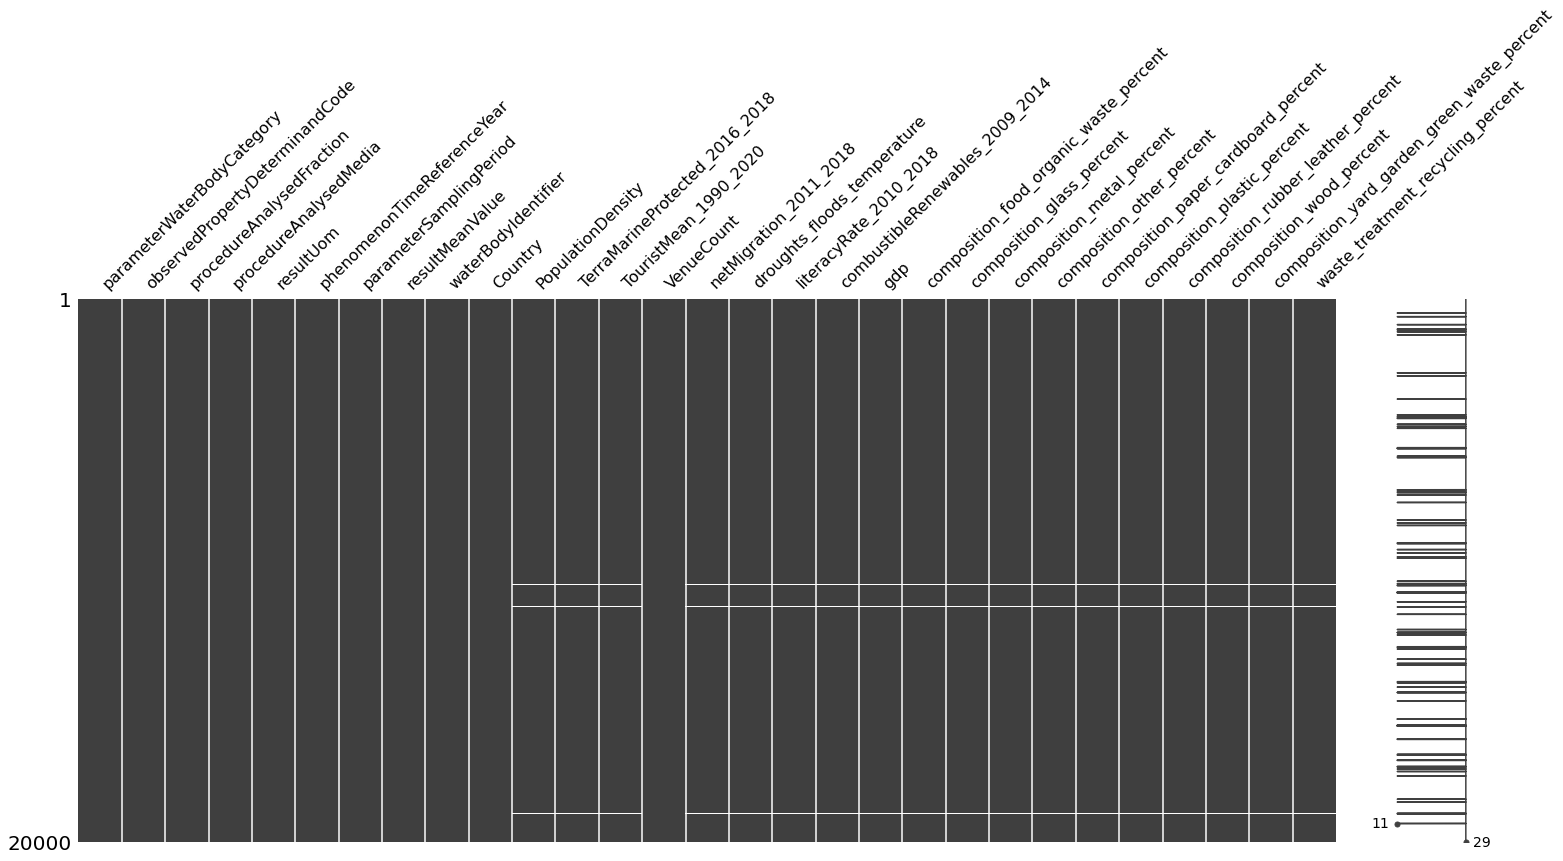

In [5]:
msno.matrix(dataset)
plt.show()

In [6]:
dataset['parameterWaterBodyCategory']

0        RW
1        RW
2        RW
3        RW
4        RW
         ..
19995    RW
19996    RW
19997    RW
19998    RW
19999    RW
Name: parameterWaterBodyCategory, Length: 20000, dtype: object

In [7]:
dataset[dataset['parameterWaterBodyCategory'] == 3]

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent


Olhando distribuição de **_y_** a partir da variavel **_parameterWaterBodyCategory_**

Variavel com valores altamente concentrados em **_RW_**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


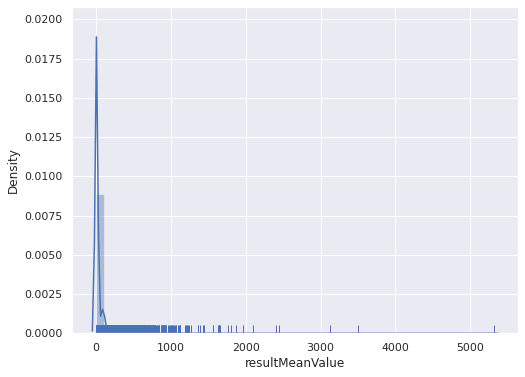

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


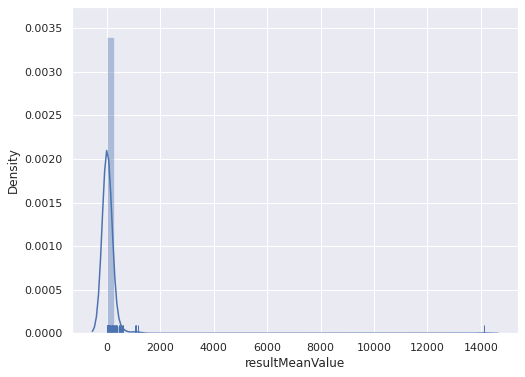

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


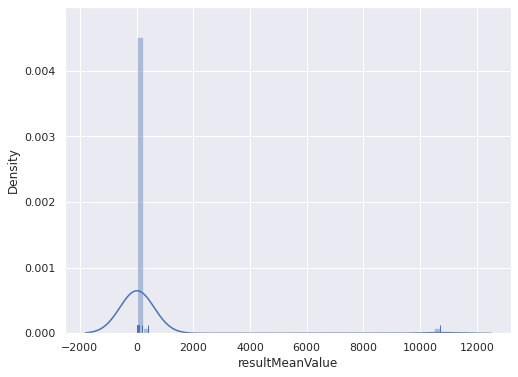

In [8]:

#x = dataset[(dataset['parameterWaterBodyCategory'] == 3) & (dataset['resultMeanValue']< 1000) & (dataset['resultMeanValue'] > -100)]['resultMeanValue']
x = dataset[(dataset['parameterWaterBodyCategory'] == 'RW') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

x = dataset[(dataset['parameterWaterBodyCategory'] == 'GW') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

x = dataset[(dataset['parameterWaterBodyCategory'] == 'LW') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

Olhando distribuição de **_y_** a partir da variavel **_procedureAnalysedMedia_**


Variavel com valores altamente concentrados em **_watter_**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


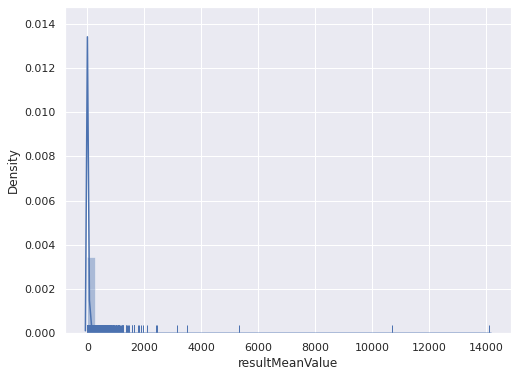

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


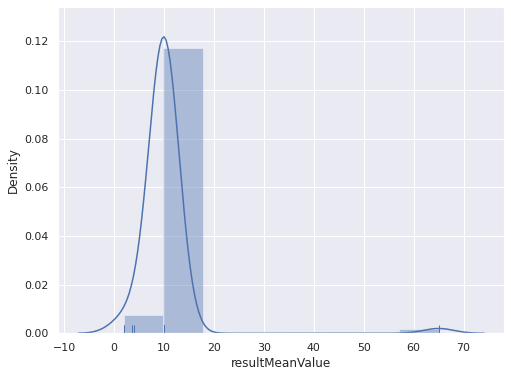

In [9]:

#x = dataset[(dataset['parameterWaterBodyCategory'] == 3) & (dataset['resultMeanValue']< 1000) & (dataset['resultMeanValue'] > -100)]['resultMeanValue']
x = dataset[(dataset['procedureAnalysedMedia'] == 'water' ) ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

x = dataset[(dataset['procedureAnalysedMedia'] == 'sediment') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()


Olhando distribuição de **_y_** a partir da variavel **_procedureAnalysedFraction_**


Variavel com valores altamente concentrados em **_total_**

In [10]:
dataset[(dataset['procedureAnalysedFraction'] == 'total' ) ].shape

(19810, 29)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


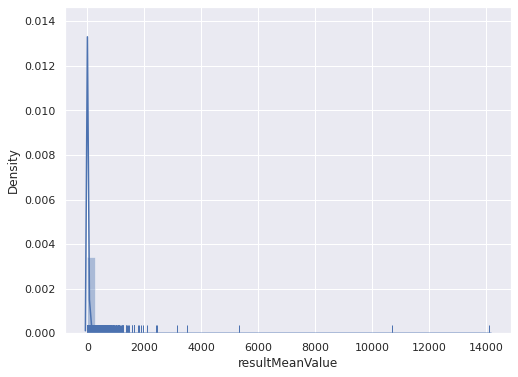

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


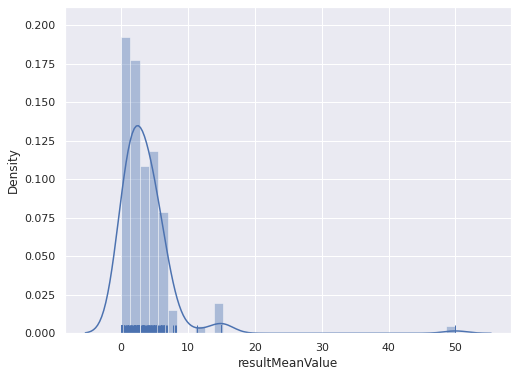

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


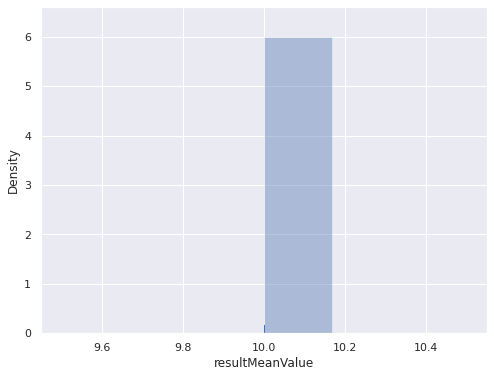

In [11]:

#x = dataset[(dataset['parameterWaterBodyCategory'] == 3) & (dataset['resultMeanValue']< 1000) & (dataset['resultMeanValue'] > -100)]['resultMeanValue']
x = dataset[(dataset['procedureAnalysedFraction'] == 'total' ) ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

x = dataset[(dataset['procedureAnalysedFraction'] == 'dissolved') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()


x = dataset[(dataset['procedureAnalysedFraction'] == 'SPM') ]['resultMeanValue']
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(x, rug=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


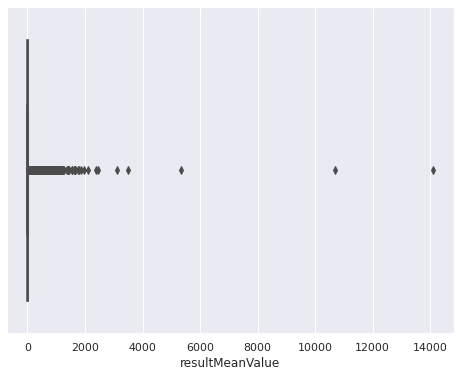

In [12]:
sns.boxplot(dataset['resultMeanValue'])

Dados com quase todos valores iguais a zero:

    literacyRate20102018
    
    compositionrubberleatherpercent
    
    compositionwoodpercent
    
    compositionyardgardengreenwastepercent

In [13]:
for x in dataset.select_dtypes(include=['object']).columns:
    labels = dataset[x].astype('category').cat.categories.tolist()
    replace_map_comp_Inco = {x : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    dataset.replace(replace_map_comp_Inco, inplace=True)

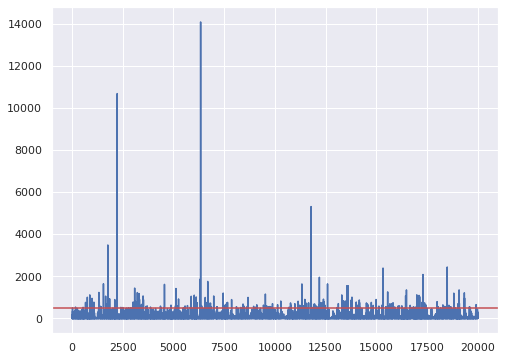

In [14]:
dataset["resultMeanValue"].plot()
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

### Separando treino e teste

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != 'resultMeanValue']
y = dataset["resultMeanValue"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train.max()

14108.0

In [17]:
# Pq a separação em 500 ?

def makeClass(y):
  y = [0 if x > 500 else 1 for x in y]
  return y

y_train, y_test = makeClass(y_train),makeClass(y_test)

In [18]:
X_train.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
5894,3,166,3,2,17,2008,15,1479,9,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.0,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3728,3,33,3,2,9,2008,15,1923,9,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.0,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
8958,3,158,3,2,1,2007,13,2822,29,274.708982,26.637511,25867961.0,0.0,325435.125,0.032407,0.0,1.728675,2.757620e+12,16.7,2.2,3.5,28.2,18.9,20.2,0.0,7.6,2.7,27.25
7671,3,137,3,2,14,2009,30,2093,9,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.0,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
5999,3,168,3,2,3,2008,15,1643,9,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.0,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [19]:
X_train.dtypes

parameterWaterBodyCategory                       int64
observedPropertyDeterminandCode                  int64
procedureAnalysedFraction                        int64
procedureAnalysedMedia                           int64
resultUom                                        int64
phenomenonTimeReferenceYear                      int64
parameterSamplingPeriod                          int64
waterBodyIdentifier                              int64
Country                                          int64
PopulationDensity                              float64
TerraMarineProtected_2016_2018                 float64
TouristMean_1990_2020                          float64
VenueCount                                     float64
netMigration_2011_2018                         float64
droughts_floods_temperature                    float64
literacyRate_2010_2018                         float64
combustibleRenewables_2009_2014                float64
gdp                                            float64
compositio

In [20]:
X_train.describe()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,16000.00000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15917.000000,15917.000000,1.591700e+04,16000.000000,15917.000000,15917.000000,15917.000000,15917.000000,1.591700e+04,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000,15917.000000
mean,2.94450,126.322438,2.987938,1.996750,10.927437,2009.003062,40.527625,1650.549188,15.667687,150.045927,26.242321,4.910017e+07,0.155688,114578.035552,0.128536,14.687029,4.655652,2.285531e+12,32.146024,7.658742,3.204017,23.511282,18.899236,11.207335,0.162739,2.074370,1.321627,23.334459
std,0.32373,59.939200,0.127153,0.056918,5.179633,1.933821,47.674036,808.513702,9.059360,76.098493,6.785323,2.476859e+07,2.123171,144805.627238,0.259134,31.379565,3.451486,9.352734e+11,11.352534,3.293237,1.149790,6.555410,4.260379,4.907811,0.739221,3.017612,3.688502,5.982618
min,1.00000,1.000000,1.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.000000,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,2.887150e+10,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,3.00000,34.000000,3.000000,2.000000,8.000000,2008.000000,15.000000,1019.000000,9.000000,122.299437,23.733280,2.586796e+07,0.000000,22854.875000,0.005718,0.000000,4.363288,1.464509e+12,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,3.00000,160.000000,3.000000,2.000000,11.000000,2009.000000,30.000000,1675.000000,9.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,3.00000,170.000000,3.000000,2.000000,14.000000,2009.000000,30.000000,2303.000000,25.000000,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,2.806036e+12,32.000000,10.000000,3.500000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,3.00000,182.000000,3.000000,2.000000,19.000000,2017.000000,263.000000,2906.000000,29.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,3.781699e+12,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


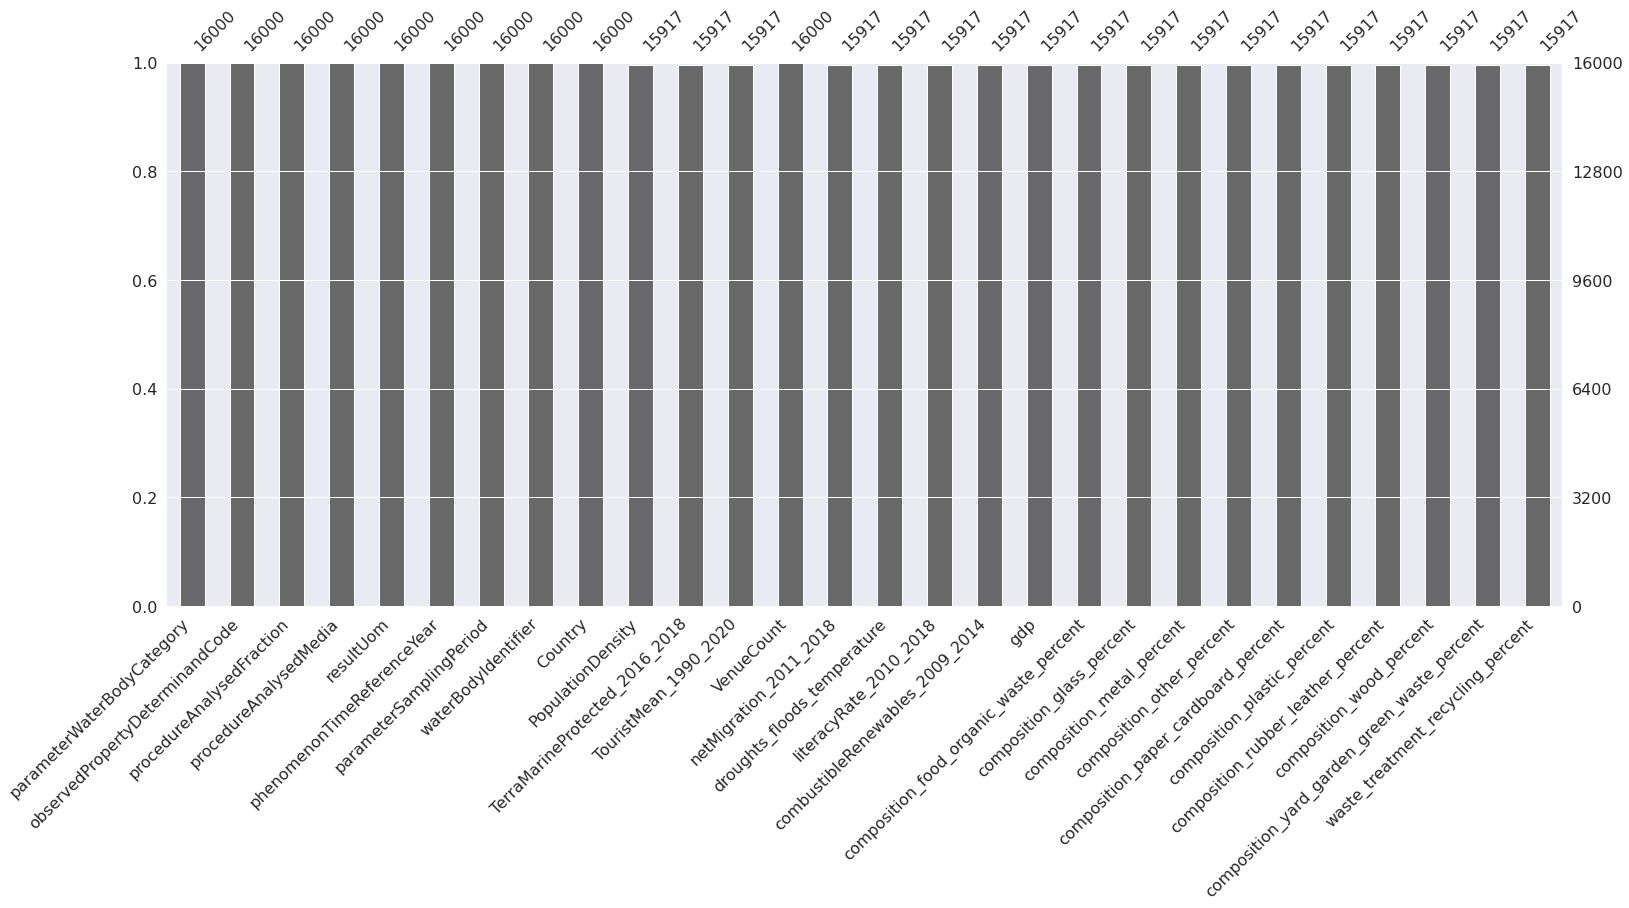

In [21]:
msno.bar(X_train)
plt.show()

In [22]:
for x in X_train.columns[X_train.isna().any()]:
    print(x)

PopulationDensity
TerraMarineProtected_2016_2018
TouristMean_1990_2020
netMigration_2011_2018
droughts_floods_temperature
literacyRate_2010_2018
combustibleRenewables_2009_2014
gdp
composition_food_organic_waste_percent
composition_glass_percent
composition_metal_percent
composition_other_percent
composition_paper_cardboard_percent
composition_plastic_percent
composition_rubber_leather_percent
composition_wood_percent
composition_yard_garden_green_waste_percent
waste_treatment_recycling_percent


In [23]:
#Imputando com mediana

#Melhor retirar os dados, não?!

#train
for x in X_train.columns[X_train.isna().any()]:
    X_train[x] =  X_train[x].fillna(X_train[x].median()); #preenche treino
    X_test[x] = X_test[x].fillna(X_train[x].median()); #preenche teste com mediana do treino

In [24]:
X_train.isna().sum()

parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
procedureAnalysedFraction                      0
procedureAnalysedMedia                         0
resultUom                                      0
phenomenonTimeReferenceYear                    0
parameterSamplingPeriod                        0
waterBodyIdentifier                            0
Country                                        0
PopulationDensity                              0
TerraMarineProtected_2016_2018                 0
TouristMean_1990_2020                          0
VenueCount                                     0
netMigration_2011_2018                         0
droughts_floods_temperature                    0
literacyRate_2010_2018                         0
combustibleRenewables_2009_2014                0
gdp                                            0
composition_food_organic_waste_percent         0
composition_glass_percent                      0
composition_metal_pe

In [25]:
X_test.isna().sum()

parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
procedureAnalysedFraction                      0
procedureAnalysedMedia                         0
resultUom                                      0
phenomenonTimeReferenceYear                    0
parameterSamplingPeriod                        0
waterBodyIdentifier                            0
Country                                        0
PopulationDensity                              0
TerraMarineProtected_2016_2018                 0
TouristMean_1990_2020                          0
VenueCount                                     0
netMigration_2011_2018                         0
droughts_floods_temperature                    0
literacyRate_2010_2018                         0
combustibleRenewables_2009_2014                0
gdp                                            0
composition_food_organic_waste_percent         0
composition_glass_percent                      0
composition_metal_pe

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 5894 to 15795
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   16000 non-null  int64  
 1   observedPropertyDeterminandCode              16000 non-null  int64  
 2   procedureAnalysedFraction                    16000 non-null  int64  
 3   procedureAnalysedMedia                       16000 non-null  int64  
 4   resultUom                                    16000 non-null  int64  
 5   phenomenonTimeReferenceYear                  16000 non-null  int64  
 6   parameterSamplingPeriod                      16000 non-null  int64  
 7   waterBodyIdentifier                          16000 non-null  int64  
 8   Country                                      16000 non-null  int64  
 9   PopulationDensity                            16000 non-null  float64


In [27]:
X_train['parameterWaterBodyCategory'].value_counts()

3    15531
1      419
2       50
Name: parameterWaterBodyCategory, dtype: int64

In [28]:
X_train['observedPropertyDeterminandCode'].value_counts()

32     1022
31     1007
33     1003
137     986
170     950
       ... 
180       1
3         1
132       1
109       1
4         1
Name: observedPropertyDeterminandCode, Length: 177, dtype: int64

In [29]:
X_train['procedureAnalysedFraction'].value_counts()

3    15841
2      125
1       34
Name: procedureAnalysedFraction, dtype: int64

In [30]:
X_train['procedureAnalysedMedia'].value_counts()

2    15948
1       52
Name: procedureAnalysedMedia, dtype: int64

In [31]:
X_train['resultUom'].value_counts()

11    2970
14    1991
18    1360
12    1265
19    1154
10    1022
9     1003
3      922
1      903
8      902
2      723
17     581
6      466
15     315
7      204
16     117
4       93
5        7
13       2
Name: resultUom, dtype: int64

In [32]:
X_train['parameterSamplingPeriod'].value_counts()

30    7284
15    3918
67    1408
13     966
12     791
      ... 
76       1
60       1
52       1
44       1
8        1
Name: parameterSamplingPeriod, Length: 242, dtype: int64

In [33]:
X_train['waterBodyIdentifier'].value_counts()

2450    45
1196    39
1300    34
1668    32
2081    31
        ..
1761     1
1753     1
1745     1
1737     1
1673     1
Name: waterBodyIdentifier, Length: 2787, dtype: int64

In [34]:
X_train['Country'].value_counts()

9     7730
29    3167
25    2477
10     438
6      400
8      276
4      262
3      212
14     176
26     143
23     107
21      95
12      82
17      82
1       73
13      70
7       66
11      38
20      28
18      23
5       17
27      17
15      10
2        5
16       4
28       1
24       1
Name: Country, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [36]:
X_train.describe()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,-1.867926e-15,-3.480688e-16,-6.981915e-16,-1.194643e-16,1.174001e-16,3.017041e-14,-6.566830e-16,-1.240674e-17,-2.833012e-16,-6.178946e-16,8.788274e-16,-8.133702e-16,2.405220e-16,-2.713801e-16,-2.997567e-16,-9.116666e-16,2.191303e-16,3.845535e-17,1.271150e-15,4.234113e-17,7.033853e-16,1.624145e-15,-3.641211e-16,-8.154727e-16,7.833907e-16,-7.038814e-17,-7.499938e-16,3.172809e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-6.006731e+00,-2.090891e+00,-1.563465e+01,-1.751263e+01,-1.916689e+00,-9.309874e+00,-8.291486e-01,-2.040288e+00,-1.619115e+00,-1.782737e+00,-3.304652e+00,-1.966483e+00,-7.333011e-02,-1.371576e+00,-4.945750e-01,-4.665784e-01,-1.042910e+00,-2.420144e+00,-1.710305e+00,-1.663448e+00,-1.589520e+00,-3.596628e+00,-3.271816e+00,-1.989980e+00,-2.195570e-01,-6.848184e-01,-3.572715e-01,-3.782035e+00
25%,1.714444e-01,-1.540316e+00,9.486864e-02,5.710164e-02,-5.652001e-01,-5.187109e-01,-5.354785e-01,-7.811481e-01,-7.360228e-01,-3.635520e-01,-3.738239e-01,-9.408157e-01,-7.333011e-02,-6.335816e-01,-4.724652e-01,-4.665784e-01,-8.463102e-02,-8.823412e-01,-1.894660e-01,-6.783114e-01,-1.769689e-01,-8.904643e-01,-1.163846e-03,-4.483703e-01,-2.195570e-01,-6.848184e-01,-3.572715e-01,-1.791210e-01
50%,1.714444e-01,5.618796e-01,9.486864e-02,5.710164e-02,1.400963e-02,-1.583702e-03,-2.208320e-01,3.024262e-02,-7.360228e-01,-3.635520e-01,6.738641e-01,7.415726e-02,-7.333011e-02,-2.669993e-01,-4.724652e-01,-4.665784e-01,-5.716445e-02,5.546543e-01,-1.282970e-02,7.081771e-01,-1.769689e-01,3.785279e-01,2.576647e-01,-4.483703e-01,-2.195570e-01,-6.848184e-01,-3.572715e-01,-1.791210e-01
75%,1.714444e-01,7.287206e-01,9.486864e-02,5.710164e-02,5.932193e-01,-1.583702e-03,-2.208320e-01,8.070008e-01,1.030161e+00,-1.612689e-01,6.738641e-01,8.932467e-01,-7.333011e-02,-2.669993e-01,-3.692594e-01,-4.665784e-01,-5.716445e-02,5.546543e-01,-1.282970e-02,7.081771e-01,-1.769689e-01,3.785279e-01,2.576647e-01,2.458644e-01,-2.195570e-01,-2.110907e-02,3.764178e-01,6.570901e-01
max,1.714444e-01,9.289297e-01,9.486864e-02,5.710164e-02,1.558569e+00,4.135434e+00,4.666677e+00,1.552837e+00,1.471708e+00,4.762274e+00,1.845041e+00,8.932467e-01,4.702750e+01,3.238685e+00,2.325163e+00,2.316730e+00,6.195473e+00,1.599748e+00,2.663211e+00,4.174398e+00,5.229090e+00,3.138204e+00,4.453041e+00,2.389825e+00,7.917458e+00,5.026400e+00,7.919831e+00,4.105833e+00


### Modelos Baseline

In [39]:
from warnings import filterwarnings

# Visualizations Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [40]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import clone_model
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

X_trainSet, X_valSet, y_trainSet, y_valSet = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

from tensorflow.keras.utils import to_categorical

y_trainset = to_categorical(y_trainSet)
y_valset = to_categorical(y_valSet)

X_trainset = np.array(X_trainSet)
X_valset = np.array(X_valSet)

X_trainset = np.expand_dims(X_trainset, axis=2)
X_valset = np.expand_dims(X_valset, axis=2)

Modelos treinados para o Baseline do problema

In [41]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier()),
         ('MLP', MLPClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_trainSet, y_trainSet)
    model_results = model.predict(X_valSet)
    score = precision_score(y_valSet, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('ADA', 0.8142485268035928),
 ('XGB', 0.8113480641057067),
 ('MLP', 0.7895621962262755),
 ('RF', 0.7649078091505772),
 ('DTC', 0.7531215239666743),
 ('KNN', 0.7393816294290227),
 ('GNB', 0.5112794091667331),
 ('NC', 0.5106320692293154),
 ('LR', 0.49390625),
 ('SVC', 0.49390625),
 ('SGDC', 0.49390625),
 ('Perc', 0.49390625),
 ('Ridge', 0.49390625),
 ('BNB', 0.49390625),
 ('PAC', 0.49389097744360905)]

### modelo LeNet (adaptado e sem TL)

In [ ]:
model = keras.Sequential()

model.add(layers.Conv1D(filters=6, kernel_size=(9), activation='relu', input_shape=(28,1)))
model.add(layers.AveragePooling1D())

model.add(layers.Conv1D(filters=16, kernel_size=(9), activation='relu'))
model.add(layers.AveragePooling1D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(2, activation = 'softmax'))

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 20, 6)             60        
                                                                 
 average_pooling1d_11 (Avera  (None, 10, 6)            0         
 gePooling1D)                                                    
                                                                 
 conv1d_19 (Conv1D)          (None, 2, 16)             880       
                                                                 
 average_pooling1d_12 (Avera  (None, 1, 16)            0         
 gePooling1D)                                                    
                                                                 
 flatten_10 (Flatten)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 120)             

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001, nesterov=True)
adamax = tf.keras.optimizers.Adamax(learning_rate=0.01)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.01)

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#compile model using precision to measure model performance
model.compile(optimizer=adadelta, loss='binary_crossentropy', metrics=[tf.keras.metrics.FalsePositives()])

#treinando o modelo
#model.fit(X_trainset, y_trainset, validation_data=(X_valset, y_valset), callbacks=[early], batch_size=20, epochs=200)

In [ ]:
modelSGD = clone_model(model)
modelSGD.build((None, 28,1))
modelSGD.compile(optimizer=sgd, loss='categorical_crossentropy')
modelSGD.load_weights('./checkpoints/SGD')
model_results = modelSGD.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.8209119496855346


In [ ]:
modelAdam = clone_model(model)
modelAdam.build((None, 28,1))
modelAdam.compile(optimizer=sgd, loss='categorical_crossentropy')
modelAdam.load_weights('./checkpoints/adam')
model_results = modelAdam.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.8712264150943396


In [ ]:
modelAdamax = clone_model(model)
modelAdamax.build((None, 28,1))
modelAdamax.compile(optimizer=sgd, loss='categorical_crossentropy')
modelAdamax.load_weights('./checkpoints/adamax')
model_results = modelAdamax.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.8838747867265573


In [ ]:
modelAdagrad = clone_model(model)
modelAdagrad.build((None, 28,1))
modelAdagrad.compile(optimizer=sgd, loss='categorical_crossentropy')
modelAdagrad.load_weights('./checkpoints/adagrad')
model_results = modelAdagrad.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.7446708463949843


In [ ]:
modelDelta = clone_model(model)
modelDelta.build((None, 28,1))
modelDelta.compile(optimizer=sgd, loss='categorical_crossentropy')
modelDelta.load_weights('./checkpoints/adadelta')
model_results = modelDelta.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.8079459798994975


### modelos resNet50 usando TL (frozen layers)

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
model.summary()

for layer in model.layers:
    layer.trainable = False

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
frozen_model_ft = tf.keras.Sequential([
  layers.Dense((32**2)*3, input_shape=(28,)),
  layers.Reshape(target_shape=(32,32,3)),
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
frozen_model_ft.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 3072)              89088     
                                                                 
 reshape_2 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_38 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23,680,898
Trainable params: 93,186
Non-trainable params: 23,587,712
____________________________________

In [ ]:
from tensorflow.keras.utils import to_categorical

y_trainset = to_categorical(y_trainSet)
y_valset = to_categorical(y_valSet)

X_trainset = np.array(X_trainSet)
X_valset = np.array(X_valSet)

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.001, nesterov=True)
adamax = tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Early Stopping
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

frozen_model_ft.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=[tf.keras.metrics.FalsePositives()])
#frozen_model_ft.fit(X_trainset, y_trainset, validation_data=(X_valset, y_valset), callbacks=[early], batch_size=20, epochs=200)

In [ ]:
modelFrozenSGD = clone_model(frozen_model_ft)
modelFrozenSGD.build((None, 28,))
modelFrozenSGD.compile(optimizer=adam, loss='categorical_crossentropy')
modelFrozenSGD.load_weights('./checkpoints/resnetSGD01')
model_results = modelFrozenSGD.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.49390625


In [ ]:
modelFrozenAdam = clone_model(frozen_model_ft)
modelFrozenAdam.build((None, 28,))
modelFrozenAdam.compile(optimizer=adam, loss='categorical_crossentropy')
modelFrozenAdam.load_weights('./checkpoints/resnetAdam01')
model_results = modelFrozenAdam.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.49390243902439024


In [ ]:
modelFrozenAdamax = clone_model(frozen_model_ft)
modelFrozenAdamax.build((None, 28,))
modelFrozenAdamax.compile(optimizer=adam, loss='categorical_crossentropy')
modelFrozenAdamax.load_weights('./checkpoints/resnetAdamax01')
model_results = modelFrozenAdamax.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.7366436717208857


### resNet50 (FineTuning)

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
model.summary()

for layer in model.layers:
    layer.trainable = True

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
model_ft = tf.keras.Sequential([
  layers.Dense((32**2)*3, input_shape=(28,)),
  layers.Reshape(target_shape=(32,32,3)),
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelFTSGD = clone_model(model_ft)
modelFTSGD.build((None, 28,))
modelFTSGD.compile(optimizer=sgd, loss='categorical_crossentropy')
modelFTSGD.load_weights('./checkpoints/resnet50TLSGDUnfrozen')
model_results = modelFTSGD.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.49390625


In [ ]:
modelFTAdam = clone_model(model_ft)
modelFTAdam.build((None, 28,))
modelFTAdam.compile(optimizer=adam, loss='categorical_crossentropy')
modelFTAdam.load_weights('./checkpoints/resnet50TLAdamUnfrozen')
model_results = modelFTAdam.predict(X_valset)
classes_x=np.argmax(model_results,axis=1)
print(classes_x)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

[1 1 1 ... 1 1 1]
0.8380184979897086


### LSTM

In [ ]:
X_valsetRF = np.array(X_valSet[colunas])
X_valsetRF = np.expand_dims(X_valsetRF, axis=2)

In [ ]:
modelLSTMRF = tf.keras.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelLSTMRF.compile(loss='binary_crossentropy', optimizer=adam)
modelLSTMRF.load_weights('./checkpoints/LSMT_RF')
model_results = modelLSTMRF.predict(X_valsetRF)
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.49390625


In [ ]:
X_valsetPCA = np.array(X_valTransf)
X_valsetPCA = np.expand_dims(X_valsetPCA, axis=2)

In [ ]:
modelLSTMPCA = tf.keras.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelLSTMPCA.compile(loss='binary_crossentropy', optimizer=adam)
modelLSTMPCA.load_weights('./checkpoints/LSMT_PCA')
model_results = modelLSTMPCA.predict(X_valsetPCA)
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.49390625


### Ensemble

In [ ]:
models = list([modelSGD, modelAdamax, modelFrozenAdamax, modelFTAdam]);
models

In [ ]:
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = np.array(yhats)
	# sum across ensemble members
	summed = np.sum(yhats, axis=0)
	# argmax across classes
	result = np.argmax(summed, axis=1)
	return result

In [ ]:
pred = ensemble_predictions(models, X_valset);

In [ ]:
score = precision_score(y_valSet, pred,average='macro')
print(score)

0.8191310454436251


### Seleção de atributos com random forest e PCA

In [42]:
rnd_clf = RandomForestClassifier(n_estimators= 500, n_jobs=-1)
rnd_clf.fit(X_trainSet, y_trainSet)
#for name, score in zip(X_trainSet.columns,rnd_clf.feature_importances_):
#  print(name, score)
zipped_lists = zip(X_trainSet.columns,rnd_clf.feature_importances_)
sorted_pairs = sorted(zipped_lists, key = lambda x: float(x[1]), reverse=True)
for name, score in sorted_pairs:
  print(name, score)
colunas = []
soma = 0
for name, score in sorted_pairs:
  colunas.append(name);
  soma += score;
  if(soma > 0.99):
    break;
print(colunas)

waterBodyIdentifier 0.5788764627707559
observedPropertyDeterminandCode 0.17006632236216357
resultUom 0.15513851048682412
parameterSamplingPeriod 0.012446129916895294
phenomenonTimeReferenceYear 0.012425783420682407
VenueCount 0.0073385905355319156
Country 0.005201809934575748
composition_other_percent 0.005006763560623441
droughts_floods_temperature 0.004015984644369933
TouristMean_1990_2020 0.003933303569003115
composition_wood_percent 0.0039280326048173435
composition_food_organic_waste_percent 0.003812722753878567
combustibleRenewables_2009_2014 0.00368671873138368
waste_treatment_recycling_percent 0.0035234686985362593
composition_plastic_percent 0.0034794126270630416
netMigration_2011_2018 0.003475576649072436
TerraMarineProtected_2016_2018 0.0032243484833793168
composition_metal_percent 0.0030687965340526996
PopulationDensity 0.002895860442003512
composition_paper_cardboard_percent 0.0028443628149376434
gdp 0.0025774617483078554
composition_glass_percent 0.002439630044984708
lite

In [43]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier()),
         ('MLP', MLPClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_trainSet[colunas], y_trainSet)
    model_results = model.predict(X_valSet[colunas])
    score = precision_score(y_valSet, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('ADA', 0.8945226917057902),
 ('XGB', 0.8234574184479666),
 ('MLP', 0.7739958679132962),
 ('RF', 0.7649078091505772),
 ('DTC', 0.7588287821177555),
 ('KNN', 0.7393816294290227),
 ('NC', 0.5142348862195263),
 ('GNB', 0.5108741303863256),
 ('SVC', 0.49390625),
 ('SGDC', 0.49390625),
 ('Ridge', 0.49390625),
 ('BNB', 0.49390625),
 ('LR', 0.4939043451078462),
 ('Perc', 0.49389480275516595),
 ('PAC', 0.49377394636015326)]

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.99)
pca.fit(X_trainSet);
X_trainTransf = pca.transform(X_trainSet)
X_valTransf = pca.transform(X_valSet)
print(X_trainTransf.shape)

(12800, 18)


In [45]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier()),
         ('MLP', MLPClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_trainTransf, y_trainSet)
    model_results = model.predict(X_valTransf)
    score = precision_score(y_valSet, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('ADA', 0.8849605419372861),
 ('XGB', 0.8135120925341746),
 ('DTC', 0.7779553579011573),
 ('RF', 0.7712762749178202),
 ('KNN', 0.7393816294290227),
 ('MLP', 0.7366436717208857),
 ('GNB', 0.5199029945818177),
 ('NC', 0.5106064027701606),
 ('LR', 0.49390625),
 ('SVC', 0.49390625),
 ('SGDC', 0.49390625),
 ('Perc', 0.49390625),
 ('Ridge', 0.49390625),
 ('BNB', 0.49389480275516595),
 ('PAC', 0.49389097744360905)]

### Seleção PCA modelos de LeNet e ResNet50

In [ ]:
modelAdamaxPCA = keras.Sequential()

modelAdamaxPCA.add(layers.Conv1D(filters=6, kernel_size=(9), activation='relu', input_shape=(18,1)))

modelAdamaxPCA.add(layers.Conv1D(filters=16, kernel_size=(9), activation='relu'))
modelAdamaxPCA.add(layers.AveragePooling1D())

modelAdamaxPCA.add(layers.Flatten())

modelAdamaxPCA.add(layers.Dense(units=120, activation='relu'))

modelAdamaxPCA.add(layers.Dense(units=84, activation='relu'))

modelAdamaxPCA.add(layers.Dense(2, activation = 'softmax'))

print(modelAdamaxPCA.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 10, 6)             60        
                                                                 
 conv1d_21 (Conv1D)          (None, 2, 16)             880       
                                                                 
 average_pooling1d_13 (Avera  (None, 1, 16)            0         
 gePooling1D)                                                    
                                                                 
 flatten_11 (Flatten)        (None, 16)                0         
                                                                 
 dense_45 (Dense)            (None, 120)               2040      
                                                                 
 dense_46 (Dense)            (None, 84)                10164     
                                                     

In [ ]:
modelAdamaxPCA.compile(optimizer=adamax, loss='categorical_crossentropy')
modelAdamaxPCA.load_weights('./checkpoints/PCASelectAdamaxLenet')
model_results = modelAdamaxPCA.predict(X_valTransf)
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.7850725524909412


In [ ]:
modelAdamRF = keras.Sequential()

modelAdamRF.add(layers.Conv1D(filters=6, kernel_size=(9), activation='relu', input_shape=(21,1)))

modelAdamRF.add(layers.Conv1D(filters=16, kernel_size=(9), activation='relu'))
modelAdamRF.add(layers.AveragePooling1D())

modelAdamRF.add(layers.Flatten())

modelAdamRF.add(layers.Dense(units=120, activation='relu'))

modelAdamRF.add(layers.Dense(units=84, activation='relu'))

modelAdamRF.add(layers.Dense(2, activation = 'softmax'))

print(modelAdamRF.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 13, 6)             60        
                                                                 
 conv1d_23 (Conv1D)          (None, 5, 16)             880       
                                                                 
 average_pooling1d_14 (Avera  (None, 2, 16)            0         
 gePooling1D)                                                    
                                                                 
 flatten_12 (Flatten)        (None, 32)                0         
                                                                 
 dense_48 (Dense)            (None, 120)               3960      
                                                                 
 dense_49 (Dense)            (None, 84)                10164     
                                                     

In [ ]:
modelAdamRF.compile(optimizer=adam, loss='categorical_crossentropy')
modelAdamRF.load_weights('./checkpoints/RFSelectAdamLenet')
model_results = modelAdamRF.predict(X_valSet[colunas])
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.49390625


In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
model.summary()

for layer in model.layers:
    layer.trainable = True

frozen_model_ftRF = tf.keras.Sequential([
  layers.Dense((32**2)*3, input_shape=(21,)),
  layers.Reshape(target_shape=(32,32,3)),
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
frozen_model_ftRF.compile(loss='binary_crossentropy', optimizer=adam)
frozen_model_ftRF.load_weights('./checkpoints/resnet50RFFT')
model_results = frozen_model_ftRF.predict(X_valSet[colunas])
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.49390625


In [ ]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
model.summary()

for layer in model.layers:
    layer.trainable = True

frozen_model_ftPCA = tf.keras.Sequential([
  layers.Dense((32**2)*3, input_shape=(18,)),
  layers.Reshape(target_shape=(32,32,3)),
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
frozen_model_ftPCA.compile(loss='binary_crossentropy', optimizer=adam)
frozen_model_ftPCA.load_weights('./checkpoints/resnet50PCAFT')
model_results = frozen_model_ftPCA.predict(X_valTransf)
classes_x=np.argmax(model_results,axis=1)
score = precision_score(y_valSet, classes_x,average='macro')
print(score)

0.8800656513238879


### Classificador de votação com melhores modelos

In [46]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[50,100,200],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'ADA':
    {
        'model':AdaBoostClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[50,100,200]
        }
    }
}

In [47]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X_train[colunas],y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
dataRF = pd.DataFrame(scores,columns=['Model','Parameters','Score'])
dataRF

,Model,Parameters,Score
0,XGB,"{'n_estimators': 200, 'max_features': 'sqrt', ...",0.99000
1,ADA,"{'n_estimators': 50, 'learning_rate': 0.0001}",0.98575


In [49]:
paramRF = dataRF['Parameters']
modelRF = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**paramRF[0])),
                                     ('ADA',AdaBoostClassifier(**paramRF[1]))
                                    ],voting='hard')

precision=[]
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X_train[colunas],y_train)

for train_index, test_index in skf.split(X_train[colunas],y_train):
    
    X_trainS, X_testS = np.array(X_train[colunas])[train_index], np.array(X_train[colunas])[test_index]
    y_trainS, y_testS = np.array(y_train)[train_index], np.array(y_train)[test_index]
    
    modelRF.fit(X_trainS,y_trainS)
    predictions=modelRF.predict(X_testS)
    score=precision_score(y_testS, predictions, average='macro')
    precision.append(score) 

np.mean(precision)

0.8495452511946349

In [50]:
pca.fit(X_train);
X_trainTransf = pca.transform(X_train);
X_testTransf = pca.transform(X_test);
X_trainTransf.shape

(16000, 18)

In [51]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X_trainTransf,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
dataPCA = pd.DataFrame(scores,columns=['Model','Parameters','Score'])
dataPCA

,Model,Parameters,Score
0,XGB,"{'n_estimators': 200, 'max_features': 'log2', ...",0.98850
1,ADA,"{'n_estimators': 50, 'learning_rate': 0.0001}",0.98575


In [52]:
paramPCA = dataPCA['Parameters']
modelPCA = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**paramPCA[0])),
                                     ('ADA',AdaBoostClassifier(**paramPCA[1]))
                                    ],voting='hard')

precision=[]
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X_trainTransf,y_train)

for train_index, test_index in skf.split(X_trainTransf,y_train):
    
    X_trainS, X_testS = np.array(X_trainTransf)[train_index], np.array(X_trainTransf)[test_index]
    y_trainS, y_testS = np.array(y_train)[train_index], np.array(y_train)[test_index]
    
    modelPCA.fit(X_trainS,y_trainS)
    predictions=modelPCA.predict(X_testS)
    score=precision_score(y_testS, predictions, average='macro')
    precision.append(score) 

np.mean(precision)

0.8169038869482265

### Resultados no teste com modelos finais

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [ ]:
model_results_LeNet = modelAdamax.predict(X_test)
classes_x_LeNet = np.argmax(model_results_LeNet,axis=1)
score = precision_score(y_test, classes_x_LeNet,average='macro')
print(score)

0.7997795635917183


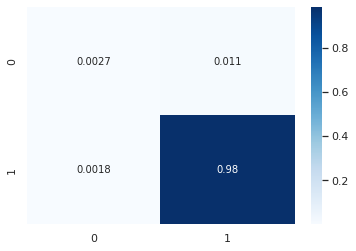

In [ ]:
cf_matrix = confusion_matrix(y_test,classes_x_LeNet)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

In [63]:
predictions_VotingClassRF = modelRF.predict(X_test[colunas])
score=precision_score(y_test, predictions_VotingClassRF, average='macro')
print(score)

0.492875


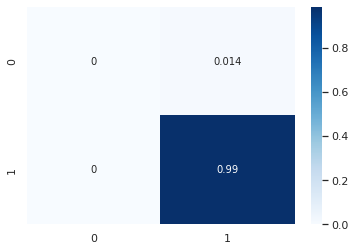

In [65]:
cf_matrix = confusion_matrix(y_test,predictions_VotingClassRF)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

In [66]:
predictions_VotingClassPCA = modelPCA.predict(X_testTransf)
score=precision_score(y_test, predictions_VotingClassPCA, average='macro')
print(score)

0.7310657024330082


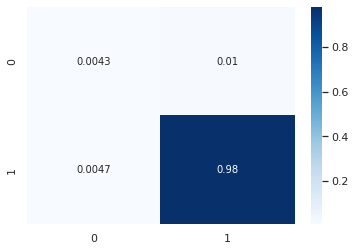

In [68]:
cf_matrix = confusion_matrix(y_test,predictions_VotingClassPCA)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

In [ ]:
model_results_ResNetPCA = frozen_model_ftPCA.predict(X_testTransf)
classes_x_ReNetPCA = np.argmax(model_results_ResNetPCA,axis=1)
score = precision_score(y_test, classes_x_ReNetPCA,average='macro')
print(score)

0.8066014056224899


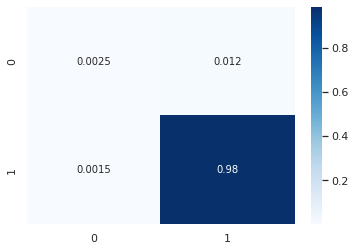

In [ ]:
cf_matrix = confusion_matrix(y_test,classes_x_ReNetPCA)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')